In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import binom

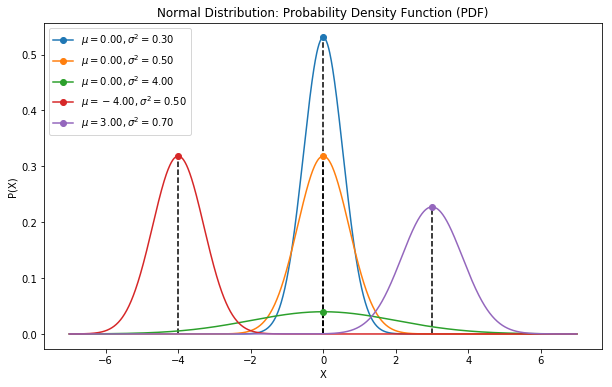

In [26]:
x = np.arange(-7, 7, 0.01)
def norm_distrib_pda(x, mu, var):
    return 1/(2*np.pi*var)*np.exp(-((x-mu)**2)/(2*var))

distribs = [(0, 0.3), (0, 0.5), (0, 4), (-4, 0.5), (3, 0.7)]

figure = plt.figure(figsize=(10, 6))
legend = []
for distrib in distribs:
    mean = distrib[0]
    variance = distrib[1]
    p = norm_distrib_pda(x, mean, variance)
    max_id = np.argmax(p)
    legend.append(r'$\mu = %.2f, \sigma^2 = %.2f$' %(mean, variance))
    plt.vlines(mean, 0, p[max_id], linestyle="dashed")
    plt.plot(x, p,'-o', markevery=[max_id])

plt.legend(legend, loc='upper left')
plt.title('Normal Distribution: Probability Density Function (PDF)')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

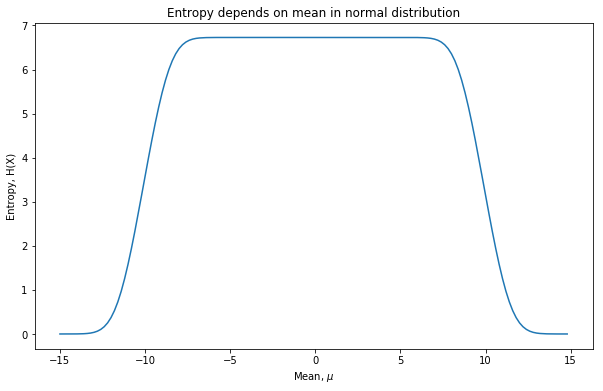

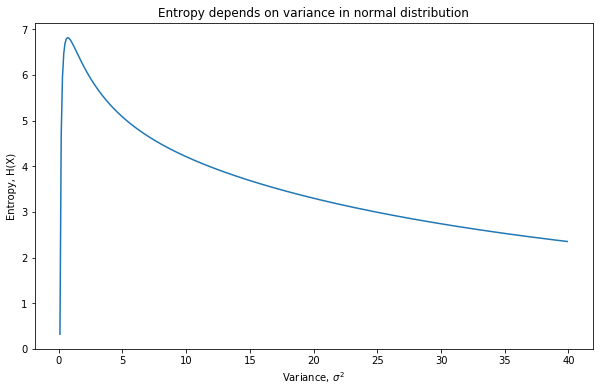

In [31]:
def norm_distrib_pda(x, mu, var):
    return 1/(2*np.pi*var)*np.exp(-((x-mu)**2)/(2*var))

def entropy(p, base=None):
    if base:
        return -np.sum(p*(np.log(p)/np.log(base)))
    else:
        return -np.sum(p*np.log(p))
    
x = np.arange(-10, 10, 0.2)

means = np.arange(-15, 15, 0.2)
m_entropies = []
for mean in means:
    p = norm_distrib_pda(x, mean, 1)
    m_entropies.append(entropy(p, base=2))

figure = plt.figure(figsize=(10, 6))
plt.plot(means, m_entropies)
plt.title('Entropy depends on mean in normal distribution')
plt.xlabel(r'Mean, $\mu$')
plt.ylabel('Entropy, H(X)')
plt.show()

var = np.arange(0.1, 40, 0.1)
v_entropies = []
for v in var:
    p = norm_distrib_pda(x, 0, v)
    v_entropies.append(entropy(p, base=2))
figure = plt.figure(figsize=(10, 6))
plt.plot(var, v_entropies)
# plt.legend(legend, loc='upper left')
plt.title('Entropy depends on variance in normal distribution')
plt.xlabel(r'Variance, $\sigma^2$')
plt.ylabel('Entropy, H(X)')
plt.show()

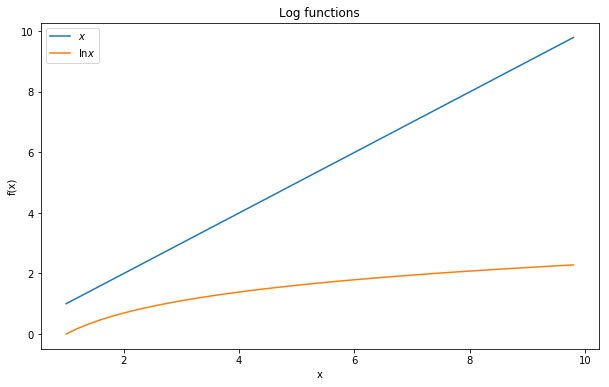

In [27]:
x = np.arange(1, 10, 0.2)

def f(x):
    return x

y = f(x)

y_log = np.log(y)

figure = plt.figure(figsize=(10, 6))
plt.plot(x, y, x, y_log)
plt.legend([r'$x$', r'$\ln{x}$'], loc='upper left')
plt.title('Log functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

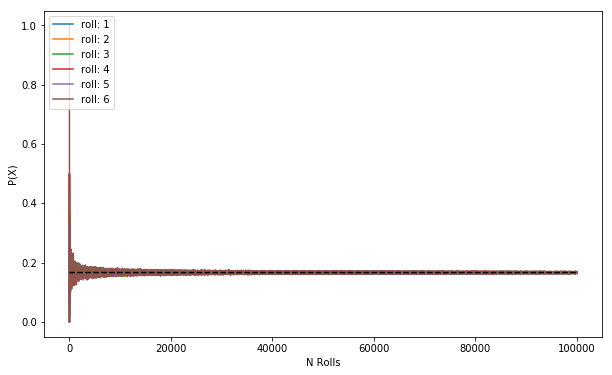

In [91]:

r_probs = [[],[],[],[],[],[]]


def probs(x):
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    return np.vstack((ii,y[ii]/len(x))).T

ROLLS = 100000
n_rolls = np.arange(1, ROLLS+1, 1, dtype=np.int)

for n_roll in n_rolls:
    rolls = np.random.randint(1, 7, n_roll)
    ps = probs(rolls)
    for p in ps:
        r_probs[int(p[0])-1].append(p[1])
    for rp in r_probs:
        if len(rp) < n_roll:
            rp.append(0)

figure = plt.figure(figsize=(10, 6))
legend = []
for (i, rp) in enumerate(r_probs):
    legend.append(r'roll: %d' %(i+1))
    plt.plot(n_rolls, rp)

plt.plot(n_rolls, np.repeat(1/6, ROLLS), color='black', linewidth=1.5, linestyle='dashed')
plt.legend(legend, loc='upper left')
plt.xlabel('N Rolls')
plt.ylabel('P(X)')
plt.show()

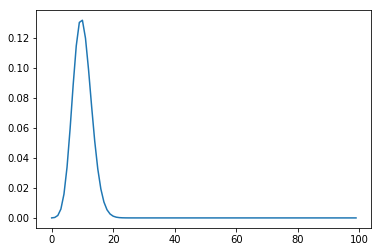

In [116]:
x = np.arange(0, 100, 1)
plt.plot(x, binom.pmf(x, 100, 0.1))
plt.show()